# Clustering Exercise Sets

In [1]:
%matplotlib inline

# reloads import files each time a cell is ran
%load_ext autoreload
%autoreload 2

from sklearn.preprocessing import MinMaxScaler
from mpl_toolkits.mplot3d import axes3d
from IPython.display import Video


from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.metrics import mean_squared_error


import acquire
import env
import prepare
import split


import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

from sklearn.cluster import KMeans
from matplotlib.animation import FuncAnimation


## Set 1: Iris Data Set
Using this lesson as a guide, perform clustering on the iris dataset.

> * Choose features other than the ones used in the lesson.
>> **sepal/petal width**
> * Visualize the results of your clustering.
>> **use vis code from curriculumn** 
> * Use the elbow method to visually select a good value for k.
>> **use code from curriculum and pick based on cats or sensible grouping**
> * Repeat the clustering, this time with 3 different features.
>> **Petal length**

## Acquire Iris data and choose features

In [2]:
iris = acquire.get_iris_data()
iris = iris.drop(columns=['Unnamed: 0', 'species_id'])
iris.head()

,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [3]:
X = iris[['sepal_width', 'petal_width']]
X.head()

,sepal_width,petal_width
0,3.5,0.2
1,3.0,0.2
2,3.2,0.2
3,3.1,0.2
4,3.6,0.2


## Create clusters

In [4]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

iris['clusters'] = kmeans.predict(X)

In [5]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centroids

,sepal_width,petal_width
0,3.041667,2.052083
1,3.451020,0.244898
2,2.707547,1.309434


## Visualize

> * Visualize the results of your clustering.
>> **use vis code from curriculumn** 

### Visualize clusters

Text(0.5, 1.0, 'Visualizing Cluster Centers')

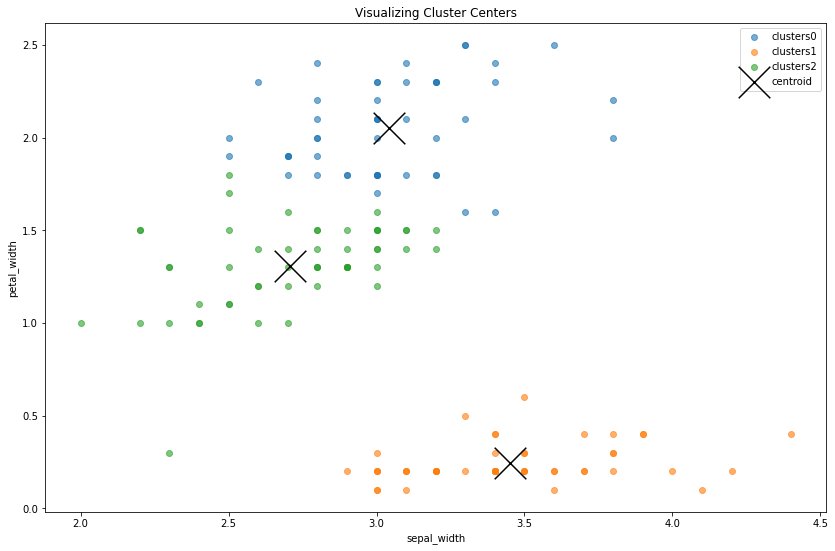

In [6]:
# visualize clusters

plt.figure(figsize=(14, 9))

for cluster, subset in iris.groupby('clusters'):
    plt.scatter(subset.sepal_width, subset.petal_width, label='clusters' + str(cluster), alpha=.6)

centroids.plot.scatter(y='petal_width', x='sepal_width', c='black', marker='x', s=1000, ax=plt.gca(), label='centroid')

plt.legend()
plt.xlabel('sepal_width')
plt.ylabel('petal_width')
plt.title('Visualizing Cluster Centers')


### Visualize actual species for comparison

<AxesSubplot:xlabel='sepal_width', ylabel='petal_width'>

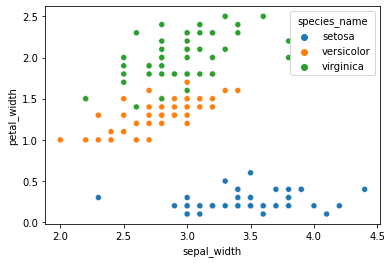

In [7]:
sns.scatterplot(X.sepal_width, X.petal_width, hue=iris.species_name)

## Elbow Visualization to adjust K

> * Use the elbow method to visually select a good value for k.
>> **use code from curriculum and pick based on cats or sensible grouping**

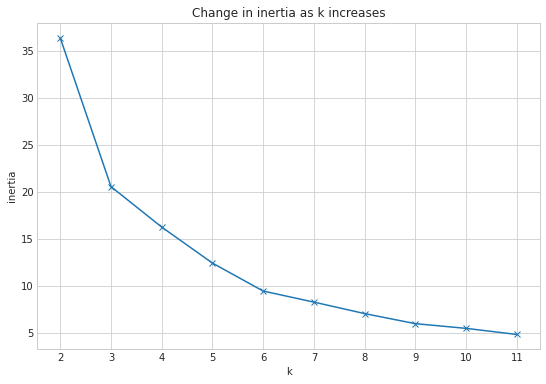

In [8]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

### NOTES

> * Biggest improvement is 2 to 3.
> * most improvement stops around 5
> * Without knowing the amount of target categories, I would have chose 4
> * Because I know the number of target categories, I think 3 makes the most sense

## Increasing Features

> * Repeat the clustering, this time with 3 different features.
>> **Add Petal length**

### Adding Petal Length

In [9]:
X['petal_length'] = iris.petal_length
X.head()

,sepal_width,petal_width,petal_length
0,3.5,0.2,1.4
1,3.0,0.2,1.4
2,3.2,0.2,1.3
3,3.1,0.2,1.5
4,3.6,0.2,1.4


# Fitting/Predicting

In [10]:
iris = acquire.get_iris_data()
iris = iris.drop(columns=['Unnamed: 0', 'species_id'])

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

iris['cluster'] = kmeans.predict(X)
iris.head()

,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name,cluster
0,1,5.1,3.5,1.4,0.2,setosa,0
1,2,4.9,3.0,1.4,0.2,setosa,0
2,3,4.7,3.2,1.3,0.2,setosa,0
3,4,4.6,3.1,1.5,0.2,setosa,0
4,5,5.0,3.6,1.4,0.2,setosa,0


## Visualize Clusters

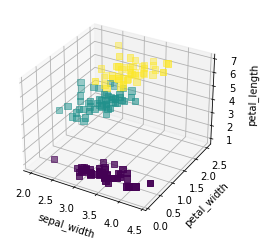

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.array(X.sepal_width)
y = np.array(X.petal_width)
z = np.array(X.petal_length)

ax.scatter(x,y,z, marker='s', c=iris.cluster, s=40)

ax.set_ylabel('petal_width')
ax.set_xlabel('sepal_width')
ax.set_zlabel('petal_length')
plt.show()

## Visualize Actual Species

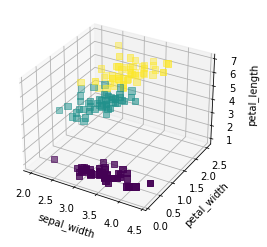

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.array(iris.sepal_width)
y = np.array(iris.petal_width)
z = np.array(iris.petal_length)

iris.species_name = iris.species_name.map({'setosa': 1, 'versicolor': 2, 'virginica': 3})

ax.scatter(x,y,z, marker='s', c=iris.species_name, s=40)


ax.set_ylabel('petal_width')
ax.set_xlabel('sepal_width')
ax.set_zlabel('petal_length')
plt.show()

## Set 2: Mall Customer Data

> * Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. 
> * Be sure to visualize your results!

### Acquire Mall Customer Data

In [13]:
mall_cust = acquire.get_mall_customer_data()
mall_cust = mall_cust.drop(columns=['Unnamed: 0'])
mall_cust.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


<AxesSubplot:xlabel='age', ylabel='spending_score'>

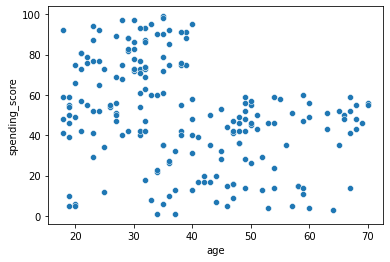

In [14]:
sns.scatterplot(x=mall_cust.age, y=mall_cust.spending_score)

**Takeaway**: Clear difference in spending score before/after 40 years of age

Action: 
> * Make age brackets

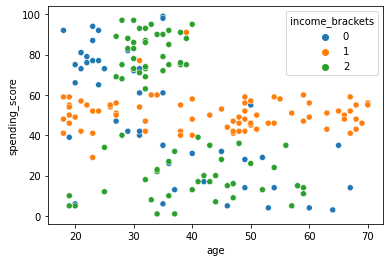

In [15]:
# create age bins for < 40 and >= 40 
mall_cust['over_40'] = pd.cut(mall_cust.age, [0,40, 80], 2,
                              labels=[0, 1])
mall_cust['income_brackets'] = pd.cut(mall_cust.annual_income, [0,40,70, 140], 3,
                                     labels = [0, 1, 2])

under_40 = mall_cust[mall_cust.over_40 == 0]
over_40 = mall_cust[mall_cust.over_40 == 1]


sns.scatterplot(x=mall_cust.age, y=mall_cust.spending_score, hue=mall_cust.income_brackets)
plt.show()

<AxesSubplot:xlabel='age', ylabel='spending_score'>

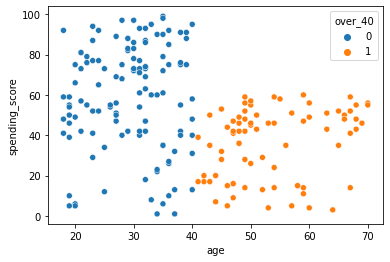

In [16]:
sns.scatterplot(x=mall_cust.age, y=mall_cust.spending_score, hue=mall_cust.over_40)


In [17]:
X = mall_cust[['annual_income', 'spending_score']]

X.head()

,annual_income,spending_score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


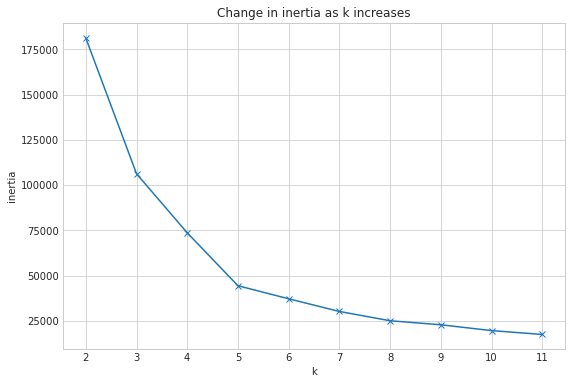

In [18]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

### Note:

> * I wanna try k=5 first

In [29]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

mall_cust['cluster_grp_1'] = kmeans.predict(X)

sns.scatterplot(X.annual_income, X.spending_score, hue=mall_cust.cluster_grp_1)

ValueError: Length of values (112) does not match length of index (200)

In [20]:
df = acquire.get_mall_customer_data()
df = df.drop(columns=['Unnamed: 0', 'customer_id'])


for col in df.columns:
    if df[col].dtype=='int64':
        df[col] = df[col].astype('float64')
        
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          200 non-null    object 
 1   age             200 non-null    float64
 2   annual_income   200 non-null    float64
 3   spending_score  200 non-null    float64
dtypes: float64(3), object(1)
memory usage: 6.4+ KB


In [21]:
train, validate, test = split.train_validate_test_split(df, 'spending_score')
scaler = MinMaxScaler()



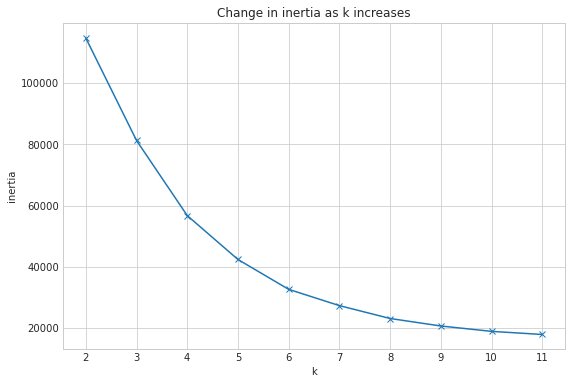

In [22]:
X = train[['age', 'annual_income', 'spending_score']]
Y = validate[['age', 'annual_income', 'spending_score']]
Z = test[['age', 'annual_income', 'spending_score']]

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')


### Note:

> * Inertia seems to stop dropping significantly at k=6/7

## K = 6

<AxesSubplot:xlabel='annual_income', ylabel='spending_score'>

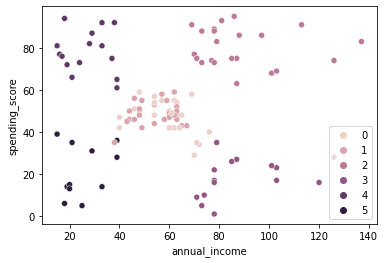

In [23]:
   
kmeans = KMeans(n_clusters=6)
kmeans.fit(X)

cluster_grp_1 = kmeans.predict(X)


sns.scatterplot(X.annual_income, X.spending_score, hue=cluster_grp_1)

## K = 7

<AxesSubplot:xlabel='annual_income', ylabel='spending_score'>

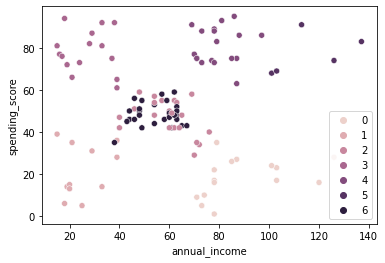

In [24]:

   
kmeans = KMeans(n_clusters=7)
kmeans.fit(X)
cluster_grp_1 = kmeans.predict(X)
cluster_grp_val = kmeans.predict(Y)
cluster_grp_test = kmeans.predict(Z)

train['cluster_grp_1'] = cluster_grp_1
train.cluster_grp_1 = train.cluster_grp_1.astype('float64')

validate['cluster_grp_1'] = cluster_grp_val
validate.cluster_grp_1 = validate.cluster_grp_1.astype('float64')

test['cluster_grp_1'] = cluster_grp_test
test.cluster_grp_1 = test.cluster_grp_1.astype('float64')



#train['cluster_grp_1'] = kmeans.predict(X)

sns.scatterplot(X.annual_income, X.spending_score, hue=cluster_grp_1)


Text(0.5, 0, 'spending_score')

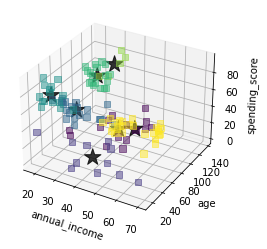

In [28]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.array(train.age)
y = np.array(train.annual_income)
z = np.array(train.spending_score)


ax.scatter(x,y,z, marker='s', c=train.cluster_grp_1, s=40, alpha=.5)
ax.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
           kmeans.cluster_centers_[:,2], s = 300, c = 'black',
           marker='*', label = 'Centroid', alpha=.8)


ax.set_ylabel('age')
ax.set_xlabel('annual_income')
ax.set_zlabel('spending_score')
# rotate the axes and update
    



In [27]:
Video("3d_animation.mov",  width=480, height=640)

In [26]:
train_scaled, validate_scaled, test_scaled, scaler = prepare.fit_and_scale(scaler, train, validate, test)
train_scaled.head()

,age,annual_income,spending_score,cluster_grp_1
0,0.403846,0.442623,0.957447,0.666667
1,0.519231,0.319672,0.553191,1.000000
2,0.192308,0.590164,0.787234,0.666667
3,0.942308,0.032787,0.138298,0.166667
4,0.057692,0.147541,0.851064,0.500000
